# Lecture 6
## Regression analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %load '../scripts/linear_regression.py'
# or 
import sys
sys.path.append('../scripts')
from linear_regression import linreg

### Linear potentiometer calibration: distance versus voltage

In [3]:
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0]) # (cm)
Y = np.array([1.2, 1.9, 3.2, 4.1, 5.3]) # (Volt)

In [4]:
a,b,RR,sxy = linreg(X,Y)

Estimate: y = ax + b
N = 5
Degrees of freedom $\nu$ = 3 
a = 1.04 $\pm$ 0.072
b = 0.02 $\pm$ 0.238
R^2 = 0.993
Syx = 0.159
y = 1.04 x + 0.02 $\pm$ 0.227 V


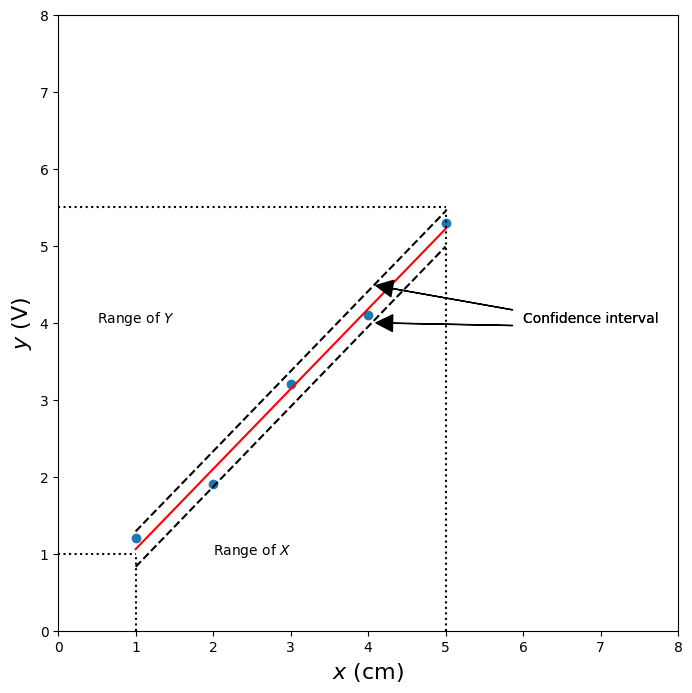

In [5]:

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(X,Y,'o')
ax.plot(X,(X*a + b),'r-')
ax.plot(X,(X*a + b +.23),'k--')
ax.plot(X,(X*a + b - .23),'k--')
ax.set_xlim((0,8))
ax.set_ylim((0,8))
ax.text(.5,4,'Range of $Y$')
ax.text(2,1,'Range of $X$')
ax.plot([0,1],[1,1],'k:')
ax.plot([0,5],[5.5,5.5],'k:')
ax.plot([1,1],[0,1],'k:')
ax.plot([5,5],[0,5.5],'k:')

ax.annotate('Confidence interval', xy=(4,4), xytext=(6,4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=.1),
            )
ax.annotate('Confidence interval', xy=(4,4.5), xytext=(6,4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=.1),
            )

ax.set_xlabel('$x$ (cm)',fontsize=16)
ax.set_ylabel('$y$ (V)',fontsize=16);

### Example 2 - hot wire calibration

We expect the calibration from the King's law in the form: 

$$ E = a + b U^m $$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# given data: 
U = np.array([0.0, 10.0, 20.0, 30.0, 40.0]) # air velocity, (m/s)
E = np.array([3.19, 3.99, 4.30, 4.48, 4.65]) # voltage (V)

### We want to use linear regression

Therefore we convert it to linear form: 
    $$ \log_{10}(E-a) = \log_{10} b + m\, \log_{10} U $$ 
    
and solve as linear regression: 

$$ Y = B + m X $$

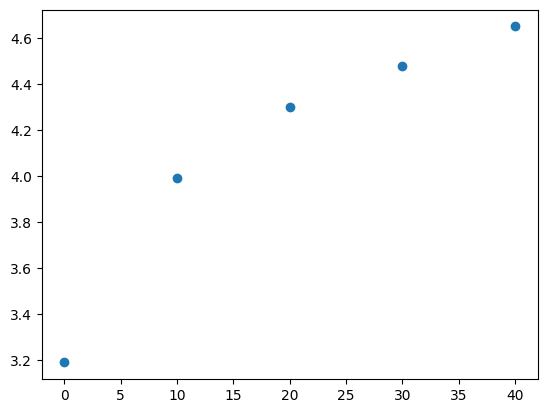

In [7]:
plt.plot(U,E,'o')

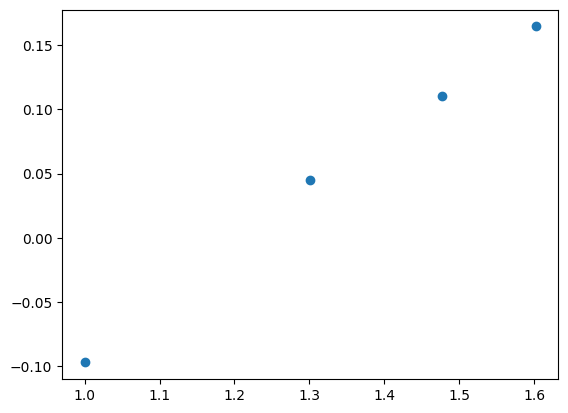

In [8]:
# since E(U = 0) = 3.19 V, we get a = 3.19 V
a = 3.19 # V
plt.plot(np.log10(U[1:]),np.log10(E[1:]-a),'o')

In [9]:
m,B,R2,syx = linreg(np.log10(U[1:]),np.log10(E[1:]-a))

Estimate: y = ax + b
N = 4
Degrees of freedom $\nu$ = 2 
a = 0.43 $\pm$ 0.033
b = -0.52 $\pm$ 0.045
R^2 = 0.997
Syx = 0.007
y = 0.43 x + -0.52 $\pm$ 0.015 V


$$ Y = -0.525 + 0.43 X \pm 0.015 (95\%) $$


$$ E = 3.19 + 0.3 U^{0.43}$$


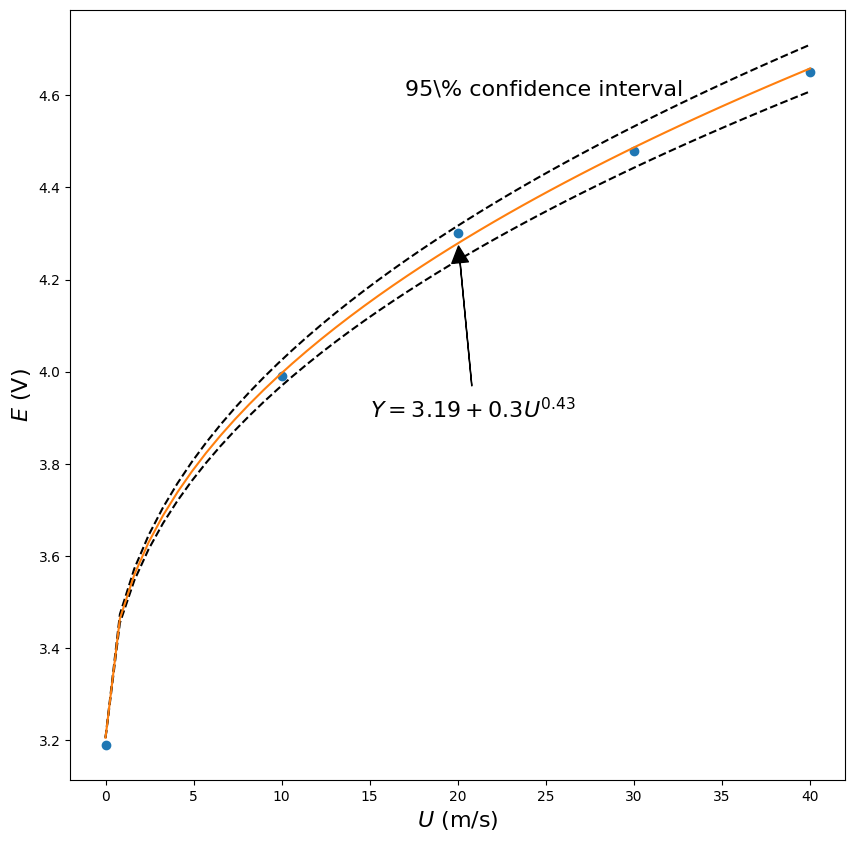

In [10]:
plt.figure(figsize=(10,10))
plt.plot(U,E,'o')

# for smooth plot
u = np.linspace(0.001,40)

x = np.log10(u)
y = m*x + B
yu = y + 0.015 # linear confidence interval 
yl = y - 0.015

Es = 10**(y) + a
Eu = 10**(yu) + a # confidence interval non-linear
El = 10**(yl) + a

plt.plot(u,El ,'k--')
plt.plot(u,Eu,'k--')
plt.plot(u,Es)
plt.xlabel("$U$ (m/s)", fontsize=16)
plt.ylabel("$E$ (V)",fontsize=16);
plt.text(17,4.6,'95\% confidence interval',fontsize=16)
plt.annotate('$Y = 3.19 + 0.3U^{0.43}$',xy=(20,4.29),xytext=(15,3.9),arrowprops=dict(facecolor='black', shrink=0.05,width=.1),fontsize=16);
